# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [4]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morphology
import skimage.measure as measure
import skimage.filters as filters
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage.morphology import disk



Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

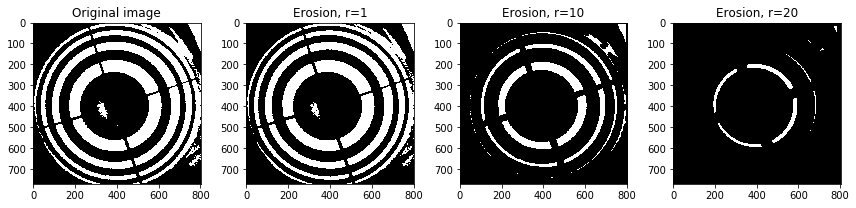

In [5]:
filename = './images/FindingContours.png'
Im = io.imread(filename)

Im_erosion1 = morphology.binary_erosion(Im, disk(1))
Im_erosion10 = morphology.binary_erosion(Im, disk(10))
Im_erosion20 = morphology.binary_erosion(Im, disk(20))
fig = plt.figure(figsize=(12,12))
plt.subplot (141)
io.imshow(Im)
plt.title('Original image')
plt.subplot (142)
io.imshow(Im_erosion1)
plt.title('Erosion, r=1')
plt.subplot (143)
io.imshow(Im_erosion10)
plt.title('Erosion, r=10')
plt.subplot (144)
io.imshow(Im_erosion20)
plt.title('Erosion, r=20')

** Q.1.2 Dilation **

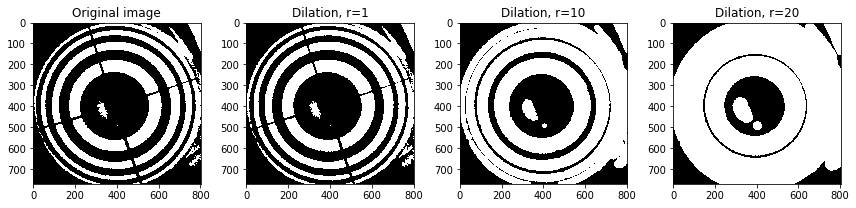

In [6]:
Im_dilation1 = morphology.dilation(Im, disk(1))
Im_dilation10 = morphology.dilation(Im, disk(10))
Im_dilation20 = morphology.dilation(Im, disk(20))
fig = plt.figure(figsize=(12,12))
plt.subplot (141)
io.imshow(Im)
plt.title('Original image')
plt.subplot (142)
io.imshow(Im_dilation1)
plt.title('Dilation, r=1')
plt.subplot (143)
io.imshow(Im_dilation10)
plt.title('Dilation, r=10')
plt.subplot (144)
io.imshow(Im_dilation20)
plt.title('Dilation, r=20')

** Q.1.3 Opening **

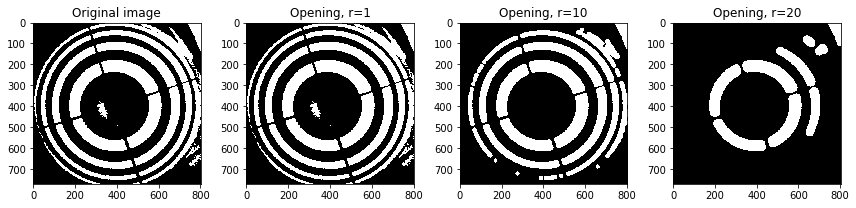

In [7]:
Im_opening1 = morphology.opening(Im, disk(1))
Im_opening10 = morphology.opening(Im, disk(10))
Im_opening20 = morphology.opening(Im, disk(20))
fig = plt.figure(figsize=(12,12))
plt.subplot (141)
io.imshow(Im)
plt.title('Original image')
plt.subplot (142)
io.imshow(Im_opening1)
plt.title('Opening, r=1')
plt.subplot (143)
io.imshow(Im_opening10)
plt.title('Opening, r=10')
plt.subplot (144)
io.imshow(Im_opening20)
plt.title('Opening, r=20')

** Q.1.4 Closing**

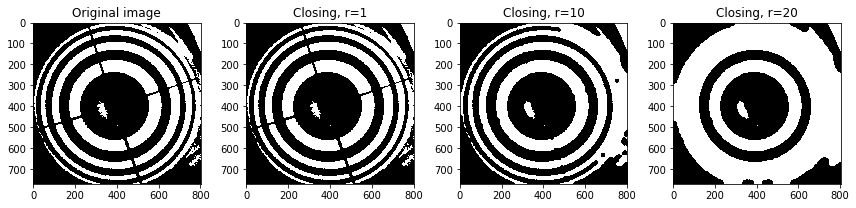

In [8]:
Im_closing1 = morphology.closing(Im, disk(1))
Im_closing10 = morphology.closing(Im, disk(10))
Im_closing20 = morphology.closing(Im, disk(20))
fig = plt.figure(figsize=(12,12))
plt.subplot (141)
io.imshow(Im)
plt.title('Original image')
plt.subplot (142)
io.imshow(Im_closing1)
plt.title('Closing, r=1')
plt.subplot (143)
io.imshow(Im_closing10)
plt.title('Closing, r=10')
plt.subplot (144)
io.imshow(Im_closing20)
plt.title('Closing, r=20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

**Erosion:** all the pixels near boundary are discarded depending upon the size of kernel. As a result, white region decreases in the image.

**Dilation:** opposite to the erosion. It increases the white region in the image, helps to join broken parts of an object.

**Opening:** erosion followed by dilation. It is useful in removing noise.

**Closing:** dilation followed by erosion. It is useful in closing small black points on the object.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\home\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


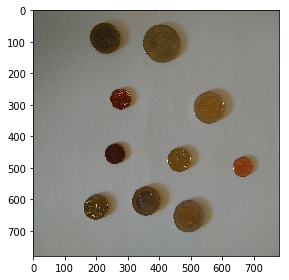

In [9]:
filename = './images/coins.jpg'
Im = io.imread(filename)
Im = img_as_ubyte(Im)
Im = rescale(Im, .25)
io.imshow(Im)


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

0.395128288335


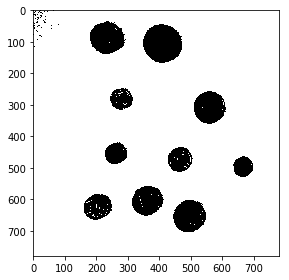

In [10]:
Im = rgb2gray(Im)
Im_Otsu = filters.threshold_otsu(Im)
Image = Im > Im_Otsu
io.imshow(Image)
print(Im_Otsu)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

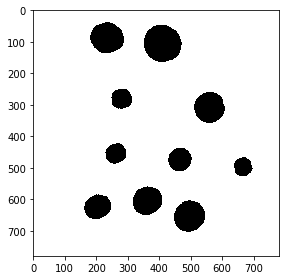

In [11]:
Im = Image
Im = morphology.dilation(Im, disk(2))
Im = morphology.opening(Im, disk(20))
Im = morphology.closing(Im, disk(10))

io.imshow(Im)

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Users\home\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


The number of regions is:10
The radius of the region is 51 pixels
The area of the region is 8226 pixels
The radius of the region is 59 pixels
The area of the region is 11230 pixels
The radius of the region is 33 pixels
The area of the region is 3445 pixels
The radius of the region is 49 pixels
The area of the region is 7546 pixels
The radius of the region is 33 pixels
The area of the region is 3417 pixels
The radius of the region is 37 pixels
The area of the region is 4379 pixels
The radius of the region is 30 pixels
The area of the region is 2819 pixels
The radius of the region is 46 pixels
The area of the region is 6779 pixels
The radius of the region is 41 pixels
The area of the region is 5250 pixels
The radius of the region is 49 pixels
The area of the region is 7709 pixels


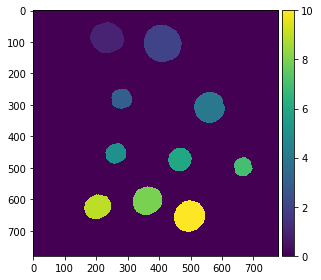

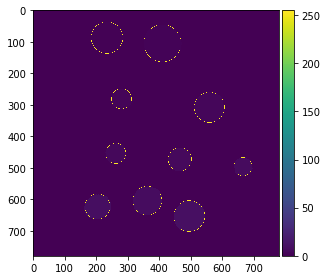

In [12]:
from skimage.draw import circle_perimeter

im_label = measure.label(Im, background=True)
regions = measure.regionprops(im_label)
io.imshow(im_label)

print('The number of regions is:{}'.format(len(regions)))
for index_region, region in enumerate(regions):
    radius = region.equivalent_diameter/2.
    print('The radius of the region is {:.0f} pixels'.format(radius))
    print('The area of the region is {:.0f} pixels'.format(region.convex_area))
    circle_coord = circle_perimeter(int(region.centroid[0]), int(region.centroid[1]), int(radius))
    im_label[circle_coord[0], circle_coord[1]] =255
    
plt.figure()
io.imshow(im_label)


### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

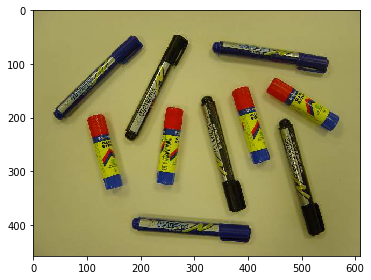

In [13]:
filename = './images/objets4.jpg'
M = io.imread(filename)
M = img_as_ubyte(M)
io.imshow(M)

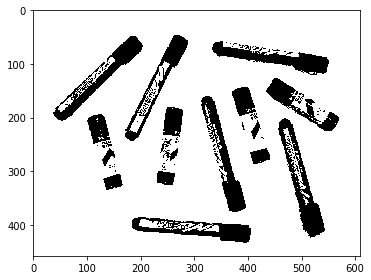

In [14]:
M = rgb2gray(M)
M_Otsu = filters.threshold_otsu(M)
Markers = M > M_Otsu
io.imshow(Markers)

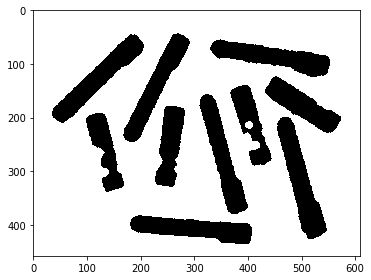

In [45]:
M = Markers
M = morphology.erosion(M, disk(3))
M = morphology.opening(M, disk(7))
M = morphology.erosion(M, disk(3))
M = morphology.dilation(M, disk(3))
M = morphology.closing(M, disk(3))



io.imshow(M)

C:\Users\home\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


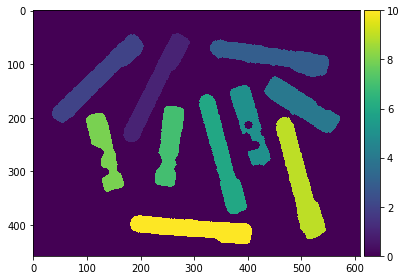

In [46]:
image_label = measure.label(M, background=True)
regions = measure.regionprops(image_label)
io.imshow(image_label)

In [49]:
#Let's count number of markers and glues
M = 0 
G = 0 
#Markers and glues are different in size. The objest with length of major axis>200 classifies as a marker.
for idx_region, region in enumerate (regions):
    axis = region.major_axis_length
    if axis > 200:
        M = M + 1
    else:
        G = G + 1

print('Number of objects= {}'.format(len(regions)))  #total number of objects in the image    
print('The number of markers = {}'.format(M))
print('The number of glues = {}'.format(G))

Number of objects= 10
The number of markers = 6
The number of glues = 4
